# CoperniFUS in interactive mode
For direct interaction with the data created and manipulated by CoperniFUS

## Step 1. Install CoperniFUS
1. Create a python environment to prevent package version conflicts. Although `pyenv` can be used, [miniconda](https://docs.anaconda.com/miniconda/install/) is recommanded.
    
    `conda create -n coperniFUS_env python=3.12`
2. Make sure that your ipython notebook kernel runs in the `coperniFUS_env` environment.
3. Install CoperniFUS

In [1]:
!pip install git+https://github.com/Tomaubier/CoperniFUS.git

  Cloning https://github.com/Tomaubier/CoperniFUS.git to /private/var/folders/j2/fy_y5kmx0wx12f1hgdntbn3m0000gn/T/pip-req-build-nyup7d5s
  Running command git clone --filter=blob:none --quiet https://github.com/Tomaubier/CoperniFUS.git /private/var/folders/j2/fy_y5kmx0wx12f1hgdntbn3m0000gn/T/pip-req-build-nyup7d5s
  Resolved https://github.com/Tomaubier/CoperniFUS.git to commit e9cdc760b829ae8de40ce79504343a513ea2d54e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyQt6-6.7.0-1-cp38-abi3-macosx_10_14_universal2.whl.metadata (2.1 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached pyqtgraph-0.13.7-py3-none-any.whl.metadata (1.3 kB)
  Using cached bg_atlasapi-1.0.3-py3-none-any.whl.metadata (12 kB)
  Using cached brainglobe_atlasapi-2.0.7-py3-none-any.whl.metadata

## Step 2. Launch CoperniFUS
(First launch after install might take some time, also you will be asked to download an atlas if you do not already have one installed on your system.)

In [1]:
from coperniFUS.viewer import coperniFUSviewer
cfv = coperniFUSviewer()

Lauching CoperniFUS


Referencing assets located in /Users/tomaubier/miniconda3/envs/coperniFUS_env/lib/python3.12/site-packages/coperniFUS/examples/assets
Cached data file located at /Users/tomaubier/coperniFUSCache/cached_db.json


2025-01-17 11:27:27.395 python[5155:70270] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-17 11:27:27.395 python[5155:70270] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [2]:
# Modules objects can be grabbed using
cfv.get_module_object_from_name()

# Armatures objects can be grabbed using
cfv.stereotaxic_frame.armatures_objects

## Step 3. Run acoustic simulation
1. Compute Brain Mesh (defined as the convex hull of the skull mesh)
2. Cut the skull acoustic window (apply boolean operation)
3. Compute the acoustic domain (apply boolean operation)
4. Run the k-Wave 3D simulation

![video_export_LUT_editor_screenshot.png](../../docs/_static/CoperniFUS_screenshot.png)

## Step 4. Grab mesh & pressure simulation data

In [2]:
acsim_armature = cfv.stereotaxic_frame.armatures_objects['kWave 3D simulation']
acsim_armature

In [3]:
acsim_armature.mesh_handler.stl_item_mesh[1].show()

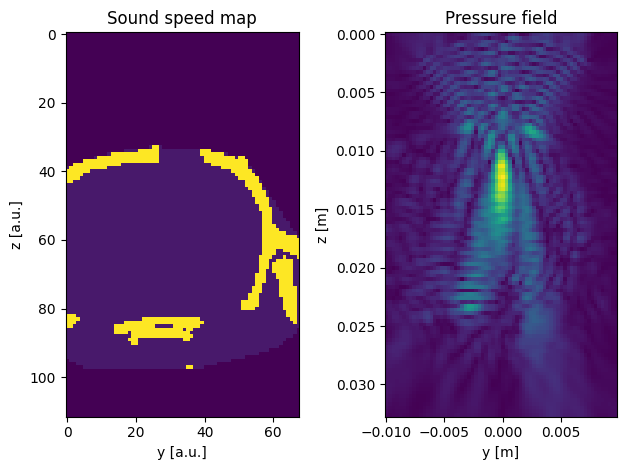

In [4]:
import matplotlib.pyplot as plt

p_amp_xyz, x, y, z = acsim_armature.kw3D.p_amp_xyz

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(acsim_armature.kw3D.medium.sound_speed[34].T)
axs[0].set_title('Sound speed map')
axs[0].set_xlabel('y [a.u.]')
axs[0].set_ylabel('z [a.u.]')

axs[1].imshow(p_amp_xyz[34].T, extent=[y[0], y[-1], z[-1], z[0]])
axs[1].set_title('Pressure field')
axs[1].set_xlabel('y [m]')
axs[1].set_ylabel('z [m]')

plt.tight_layout()
plt.show()

In [5]:
# Grab kWave 3S Simulation Armature affine transform matrix
acsim_armature.end_transform_mat

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.99756405, -0.06975647,  0.        ],
       [ 0.        ,  0.06975647, -0.99756405,  0.        ],
       [-0.005     , -0.00359282,  0.00697611,  1.        ]])